# Task-03
# DataSceince
# Prodigy InfoTech.

### Overview of the Bank Marketing Dataset
#### Features (Columns)
#### The dataset typically includes the following features:
#### age: Age of the client.
#### job: Type of job (categorical: "admin.", "blue-collar", "entrepreneur", etc.).
#### marital: Marital status (categorical: "married", "single", "divorced").
#### education: Education level (categorical: "secondary", "tertiary", "primary", etc.).
#### default: Has credit in default? (binary: "yes", "no").
#### balance: Average yearly balance in euros.
#### housing: Has a housing loan? (binary: "yes", "no").
#### loan: Has a personal loan? (binary: "yes", "no").
#### contact: Contact communication type (categorical: "unknown", "telephone", "cellular").
#### day: Last contact day of the month.
#### month: Last contact month of the year (categorical: "jan", "feb", "mar", etc.).
#### duration: Last contact duration, in seconds.
#### campaign: Number of contacts performed during this campaign.
#### pdays: Number of days since the client was last contacted from a previous campaign (numeric; 999 means the client was not previously contacted).
#### previous: Number of contacts performed before this campaign.
#### poutcome: Outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success").
#### y: Target variable indicating if the client has subscribed to a term deposit (binary: "yes", "no").



# import library needed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing  import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier  , plot_tree
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix 

# wrangle function

In [2]:
def wrangle(path):
    # Read the data with the correct delimiter and quote character
    df = pd.read_csv(path, delimiter=';', quotechar='"')
    print("frist 10 rows: ")
    print(df.head(10))
    print()
    
    #data information
    print("data info: ")
    print(df.info())
    print()
    
    #remove outlayer 
    columns=['age','balance','day','duration','campaign','pdays','previous']
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    #descriptive data
    print("statiatical description of data: ")
    print(df.describe())
    print()
    # Return the DataFrame and its info
    return df

In [3]:
#read path
train_data=wrangle(r"bank-full.csv")

frist 10 rows: 
   age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown

#### note : data is clean 

# visiaulize how 'deposit' column value varies depending on other categorical columns' 

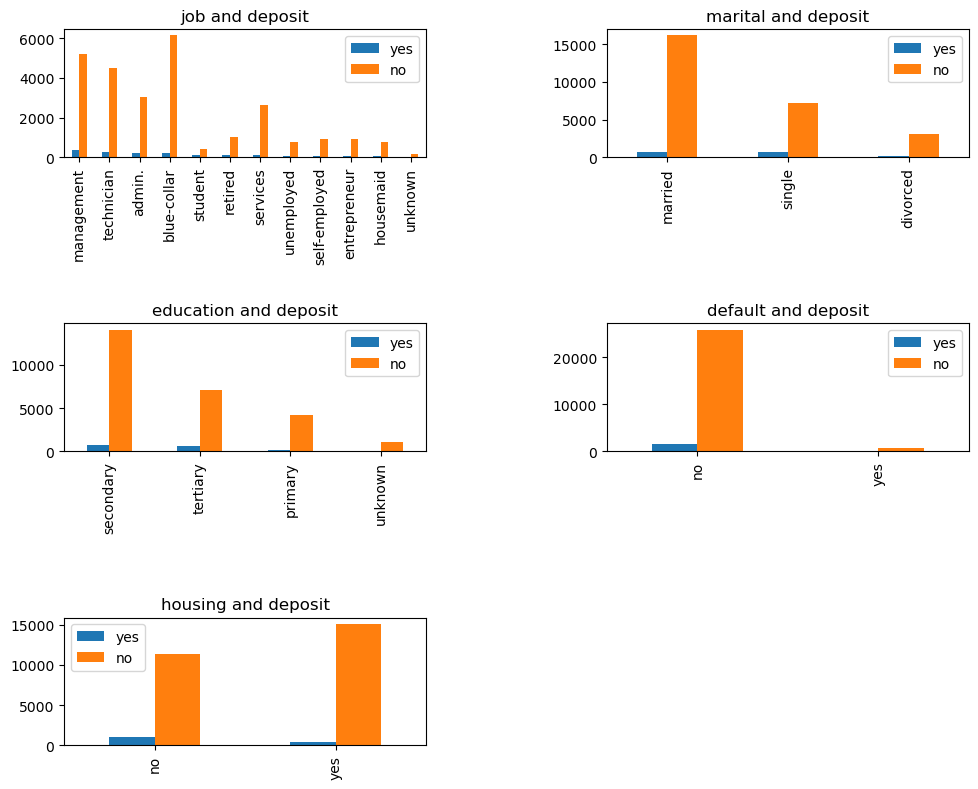

In [7]:
#categorical_features and deposit
categorical_features = ['job','marital','education','default','housing']

fig, axs = plt.subplots(3,2, figsize=(10, 8))

# Flatten the axs array to easily iterate through it
axs = axs.flatten()

for i , column in enumerate(categorical_features):
    df = pd.DataFrame()
    df['yes'] = train_data[train_data['y'] == 'yes'][column].value_counts()
    df['no'] = train_data[train_data['y'] == 'no'][column].value_counts()

    df.plot.bar(title = f'{column} and deposit' , ax=axs[i])

# Adjust layout to prevent overlap and add space between subplots
plt.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=1.3)  # Adjust these values as needed for more/less space
    
# Remove any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# visiaulize how 'deposit' column value varies depending on other numerical columns' 

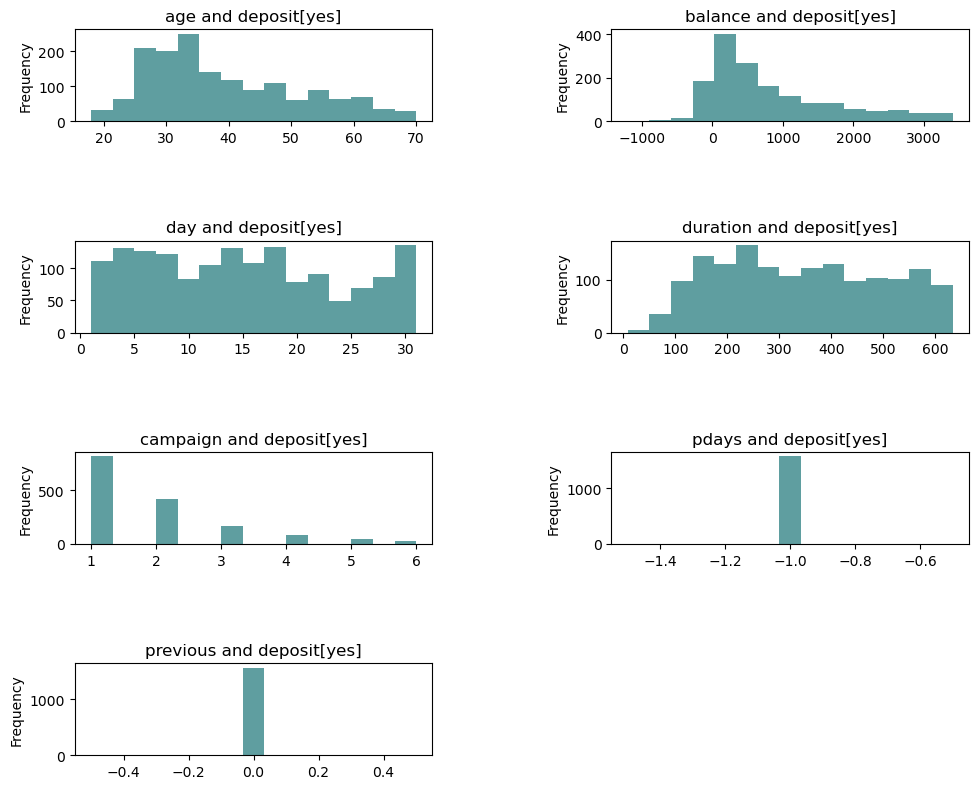

In [9]:
#categorical_features and deposit
numerical_features = ['age','balance','day','duration','campaign','pdays','previous']

fig, axs = plt.subplots(4,2, figsize=(10, 8))

# Flatten the axs array to easily iterate through it
axs = axs.flatten()

for i , column in enumerate(numerical_features):

    (train_data[train_data['y'] == 'yes'][column]).plot.hist(title = f'{column} and deposit[yes]' ,bins=15,color = 'CadetBlue', ax=axs[i])
        
# Adjust layout to prevent overlap and add space between subplots
plt.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=1.3)  # Adjust these values as needed for more/less space
    
# Remove any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

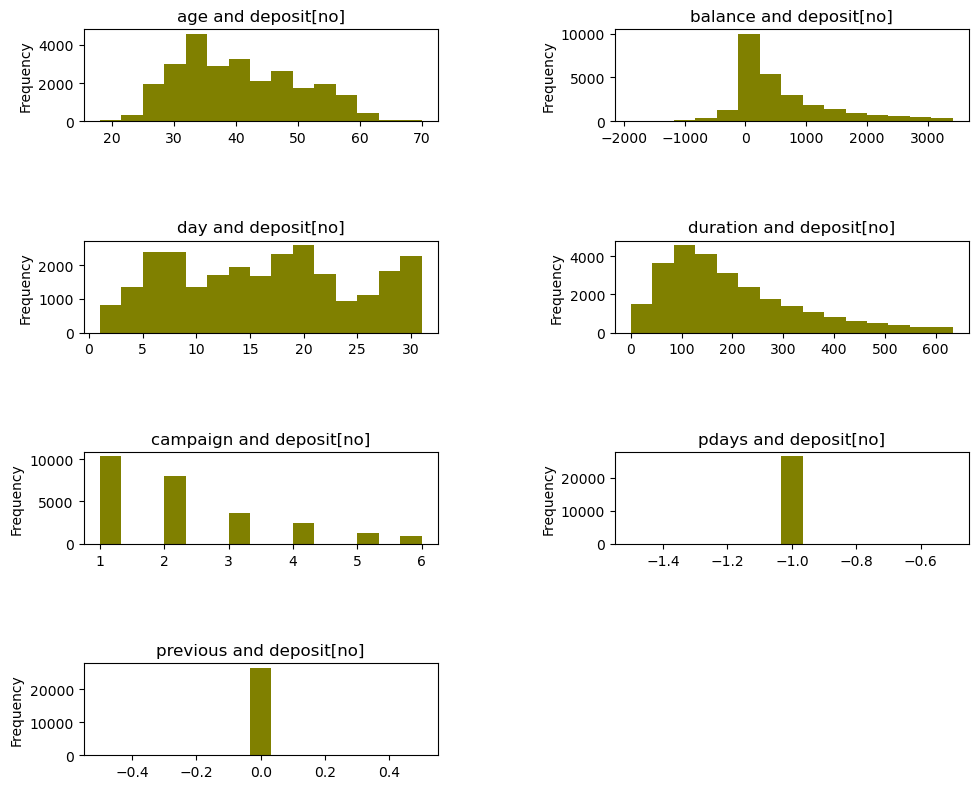

In [10]:
fig, axs = plt.subplots(4,2, figsize=(10, 8))

# Flatten the axs array to easily iterate through it
axs = axs.flatten()

for i , column in enumerate(numerical_features):

    (train_data[train_data['y'] == 'no'][column]).plot.hist(title = f'{column} and deposit[no]' ,bins=15,color = 'olive', ax=axs[i])
        
# Adjust layout to prevent overlap and add space between subplots
plt.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=1.3)  # Adjust these values as needed for more/less space
    
# Remove any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# data spliting 

In [11]:
# split data with 80% training and 20% testing 
X_train, X_test, y_train, y_test = train_test_split(train_data.drop(columns='y'),
                                                    train_data['y'], 
                                                    test_size=0.3,
                                                    random_state=42)

# Build decision tree classifier model

In [27]:
model = make_pipeline(
    ColumnTransformer(
        [("onehot", OneHotEncoder(handle_unknown='ignore'), X_train.columns)], 
        remainder="passthrough"
    ),
    DecisionTreeClassifier(random_state=0,max_depth=4 , min_samples_split=5)
)
model.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object'))])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_split=5,
                                        random_state=0))])

# evoulate the prediction

In [28]:
y_pred = model.predict(X_test)

# Calculate accuracy
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# Print classification report
print(classification_report(y_test, y_pred))

Model accuracy score: 0.9445
              precision    recall  f1-score   support

          no       0.95      1.00      0.97      7946
         yes       0.60      0.05      0.09       475

    accuracy                           0.94      8421
   macro avg       0.77      0.52      0.53      8421
weighted avg       0.93      0.94      0.92      8421



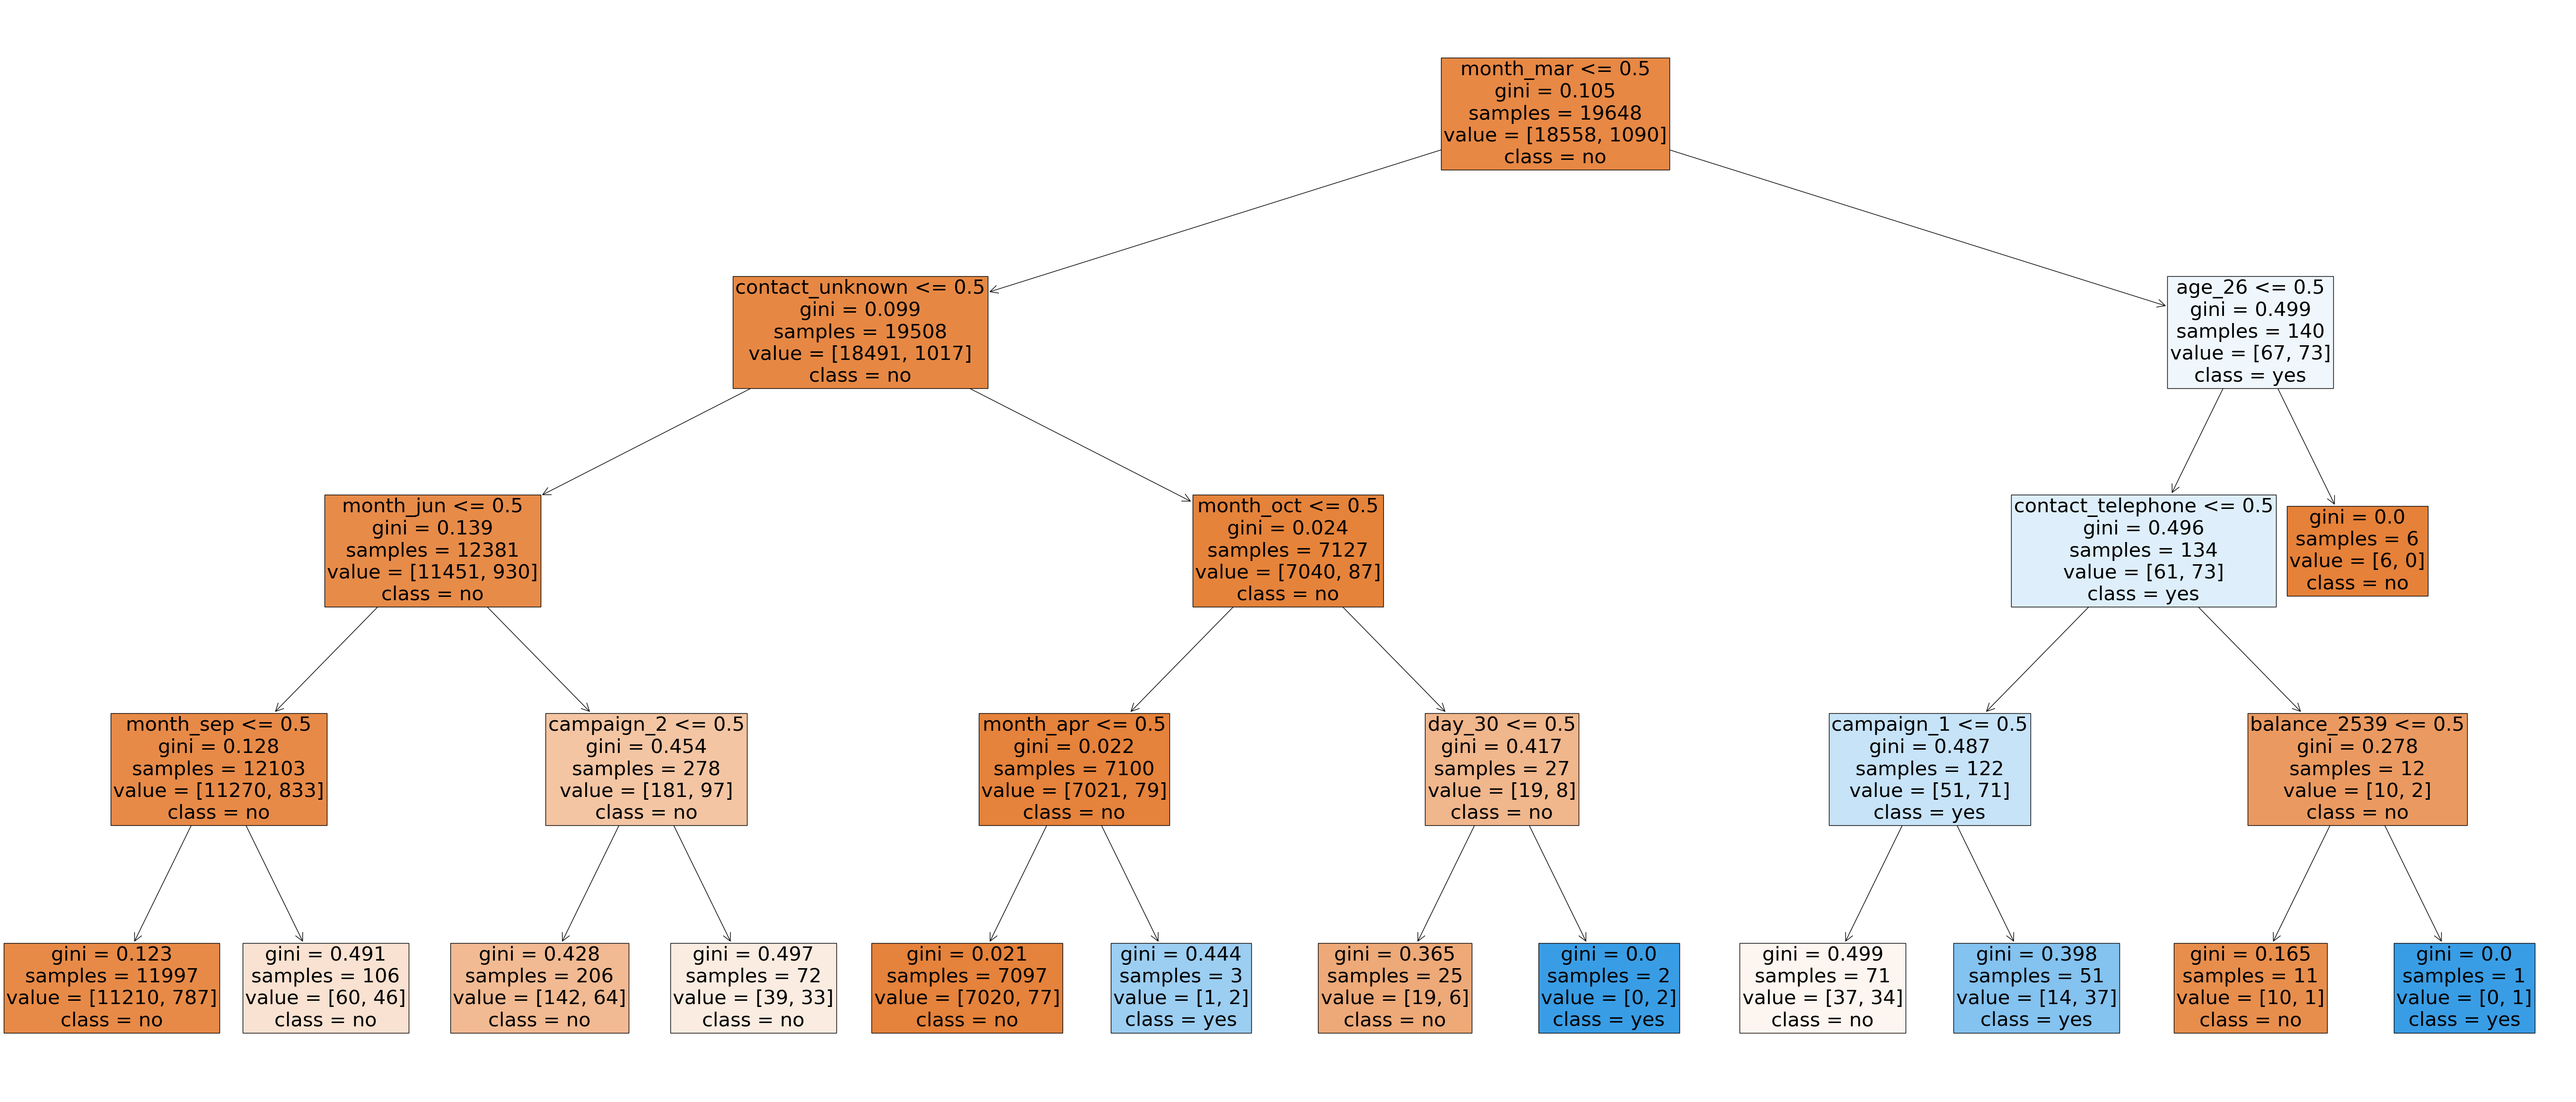

In [29]:
# Extract the decision tree classifier from the pipeline
decision_tree = model.named_steps['decisiontreeclassifier']
# Get the feature names after encoding
column_transformer = model.named_steps['columntransformer']
onehot_encoder = column_transformer.named_transformers_['onehot']
encoded_features = onehot_encoder.get_feature_names_out(X_train.columns)

# Plot the decision tree
plt.figure(figsize=(70,30))
plot_tree(decision_tree, filled=True, feature_names=encoded_features, class_names=['no' , 'yes'],fontsize=30)
plt.show()